In [5]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd

In [6]:
import episcanpy as epi

In [7]:
adata = ad.read("adata_ATAC_prepared.h5ad") 

In [8]:
adata

AnnData object with n_obs × n_vars = 45549 × 304034
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [9]:
adata.X

<45549x304034 sparse matrix of type '<class 'numpy.int64'>'
	with 238304892 stored elements in Compressed Sparse Row format>

In [11]:
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')

In [12]:
# display information stored in adata.obs
adata.obs

,author_cell_type,age_group,donor_id,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,TSS_percentile,nucleosome_signal,percent_mt,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
4_AAACAGCCAACACTTG-1,EN-fetal-late,late fetal,LaFet1,3483,1685.0,4518.0,4024.0,0.31,1.103503,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,t<2(H>sg#K
4_AAACAGCCACCAAAGG-1,EN-fetal-late,late fetal,LaFet1,4863,2149.0,4641.0,4128.0,0.72,1.002789,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,HPU?^1i&Yf
4_AAACAGCCATAAGTTC-1,EN-fetal-late,late fetal,LaFet1,11069,3707.0,12512.0,10169.0,0.51,1.054060,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,vKJ1WULiG^
4_AAACATGCATAGTCAT-1,EN-fetal-late,late fetal,LaFet1,7990,2919.0,5437.0,4844.0,0.47,1.141570,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,FE0>j_!1Tq
4_AAACATGCATTGTCAG-1,EN-fetal-late,late fetal,LaFet1,6873,2652.0,5268.0,4626.0,0.48,1.137788,0.021418,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,3sotId$RTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150666_TTTGTGAAGACAACAG-1,Oligodendrocytes,adulthood,Adult1,926,545.0,6654.0,5913.0,0.34,1.029844,1.500938,...,tissue,oligodendrocyte,10x multiome,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,=x`E$@Xdkm
150666_TTTGTGAAGGCTGTGC-1,OPC,adulthood,Adult1,1578,1023.0,5996.0,5311.0,0.03,0.712973,0.121433,...,tissue,oligodendrocyte precursor cell,10x multiome,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,#bnI9b>C>}
150666_TTTGTGAAGTAAGAAC-1,Oligodendrocytes,adulthood,Adult1,352,303.0,4787.0,4226.0,0.44,1.304045,0.939702,...,tissue,oligodendrocyte,10x multiome,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,mN;XZnza^;


In [13]:
# checking the variable names:
print(adata.var_names)

Index(['chr1-10063-10327', 'chr1-180726-180979', 'chr1-181323-181566',
       'chr1-190727-191632', 'chr1-777615-779293', 'chr1-779602-779948',
       'chr1-816964-817422', 'chr1-817809-818264', 'chr1-818686-818982',
       'chr1-826700-827679',
       ...
       'chrY-21421948-21422517', 'chrY-21439912-21440212',
       'chrY-21440417-21440769', 'chrY-21481556-21481928',
       'chrY-21602310-21602954', 'chrY-21821571-21822130',
       'chrY-21829019-21829544', 'chrY-26352947-26353241',
       'chrY-26354174-26354520', 'chrY-26670358-26671639'],
      dtype='object', length=304034)


In [14]:
# Check if the data matrix is binary - if not, binarize the data matrix
print(np.max(adata.X))

32


In [16]:
# If not, run the following commands:
epi.pp.binarize(adata)
print(np.max(adata.X))

1


In [17]:
adata

AnnData object with n_obs × n_vars = 45549 × 304034
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [18]:
# remove any potential empty features or barcodes
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)

In [19]:
# check:
adata

AnnData object with n_obs × n_vars = 45549 × 304034
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'nb_features'
    var: 'n_cells'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [22]:
adata.obs['nCount_ATAC']

index
4_AAACAGCCAACACTTG-1          4518.0
4_AAACAGCCACCAAAGG-1          4641.0
4_AAACAGCCATAAGTTC-1         12512.0
4_AAACATGCATAGTCAT-1          5437.0
4_AAACATGCATTGTCAG-1          5268.0
                              ...   
150666_TTTGTGAAGACAACAG-1     6654.0
150666_TTTGTGAAGGCTGTGC-1     5996.0
150666_TTTGTGAAGTAAGAAC-1     4787.0
150666_TTTGTGAAGTCTTGAA-1     3336.0
150666_TTTGTTGGTGATCAGC-1     7260.0
Name: nCount_ATAC, Length: 45549, dtype: float64

In [23]:
epi.pp.qc_stats(adata, verbose=True)

added keys n_cells, log_n_cells to .var
added keys n_features, log_n_features to .obs


In [24]:
adata.obs

,author_cell_type,age_group,donor_id,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,TSS_percentile,nucleosome_signal,percent_mt,...,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,nb_features,n_features,log_n_features
index,,,,,,,,,,,,,,,,,,,,,
4_AAACAGCCAACACTTG-1,EN-fetal-late,late fetal,LaFet1,3483,1685.0,4518.0,4024.0,0.31,1.103503,0.000000,...,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,t<2(H>sg#K,4446,4446,3.647969
4_AAACAGCCACCAAAGG-1,EN-fetal-late,late fetal,LaFet1,4863,2149.0,4641.0,4128.0,0.72,1.002789,0.000000,...,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,HPU?^1i&Yf,4430,4430,3.646404
4_AAACAGCCATAAGTTC-1,EN-fetal-late,late fetal,LaFet1,11069,3707.0,12512.0,10169.0,0.51,1.054060,0.000000,...,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,vKJ1WULiG^,11136,11136,4.046729
4_AAACATGCATAGTCAT-1,EN-fetal-late,late fetal,LaFet1,7990,2919.0,5437.0,4844.0,0.47,1.141570,0.000000,...,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,FE0>j_!1Tq,5337,5337,3.727297
4_AAACATGCATTGTCAG-1,EN-fetal-late,late fetal,LaFet1,6873,2652.0,5268.0,4626.0,0.48,1.137788,0.021418,...,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,3sotId$RTP,5101,5101,3.707655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150666_TTTGTGAAGACAACAG-1,Oligodendrocytes,adulthood,Adult1,926,545.0,6654.0,5913.0,0.34,1.029844,1.500938,...,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,=x`E$@Xdkm,6711,6711,3.826787
150666_TTTGTGAAGGCTGTGC-1,OPC,adulthood,Adult1,1578,1023.0,5996.0,5311.0,0.03,0.712973,0.121433,...,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,#bnI9b>C>},6223,6223,3.794000
150666_TTTGTGAAGTAAGAAC-1,Oligodendrocytes,adulthood,Adult1,352,303.0,4787.0,4226.0,0.44,1.304045,0.939702,...,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,mN;XZnza^;,4658,4658,3.668199


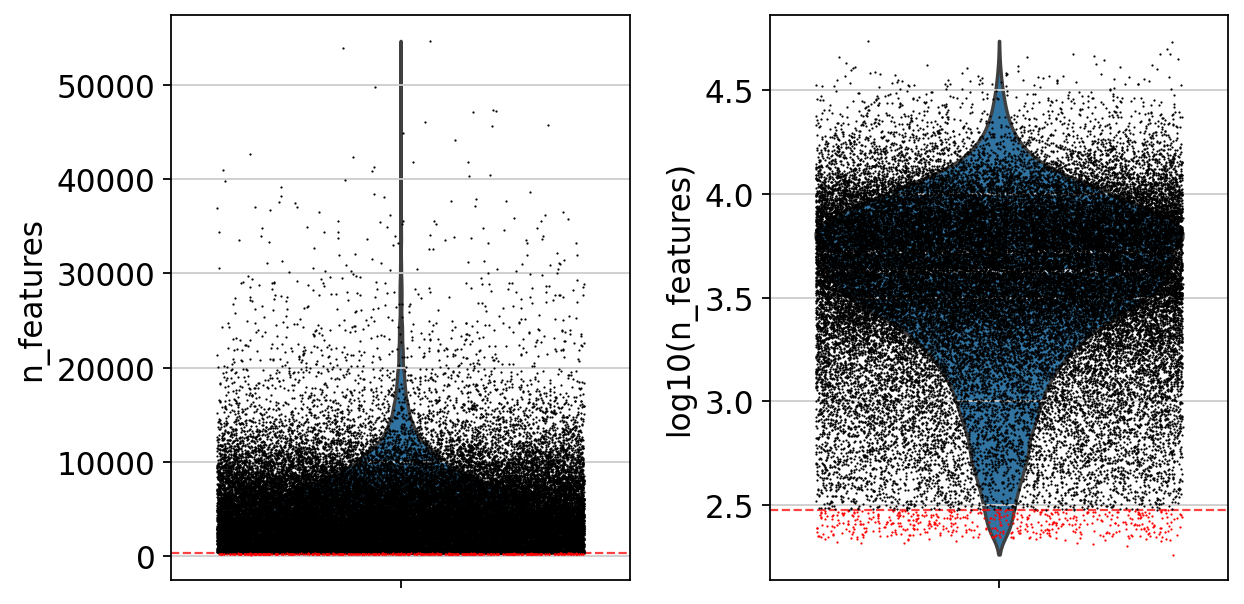

In [36]:
min_features = 300
max_features = None

epi.pl.violin(adata, "n_features", min_threshold=min_features, max_threshold=max_features, show_log=True, show_mean=True, show_median=True, print_statistics=False, save=None)


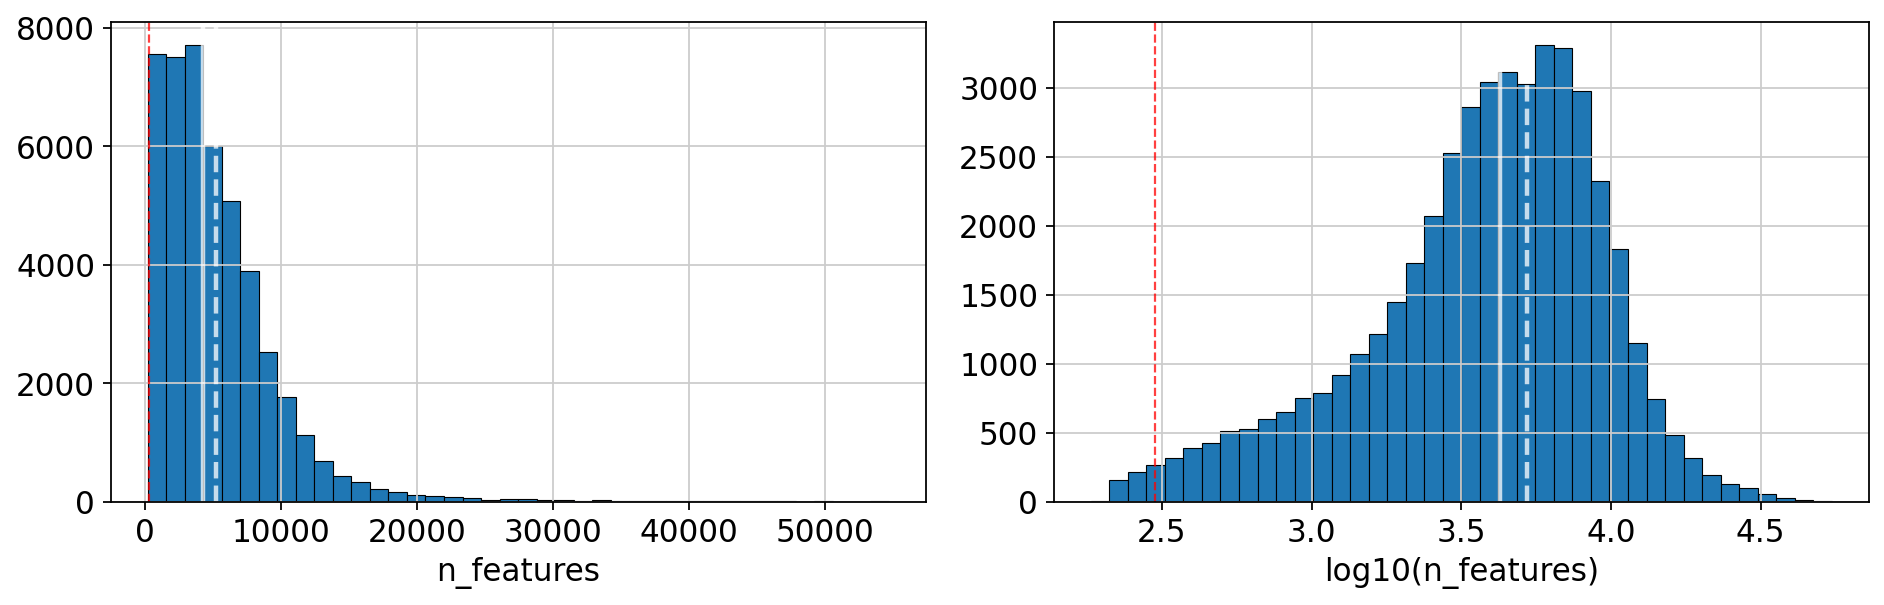

Max:	54673
Median:	4273.0
Mean:	5231.835869064085
Min:	183


In [37]:
epi.pl.histogram(adata, "n_features", bins=40, min_threshold=min_features, max_threshold=max_features, show_log=True, show_mean=True, show_median=True, print_statistics=True, save=None)

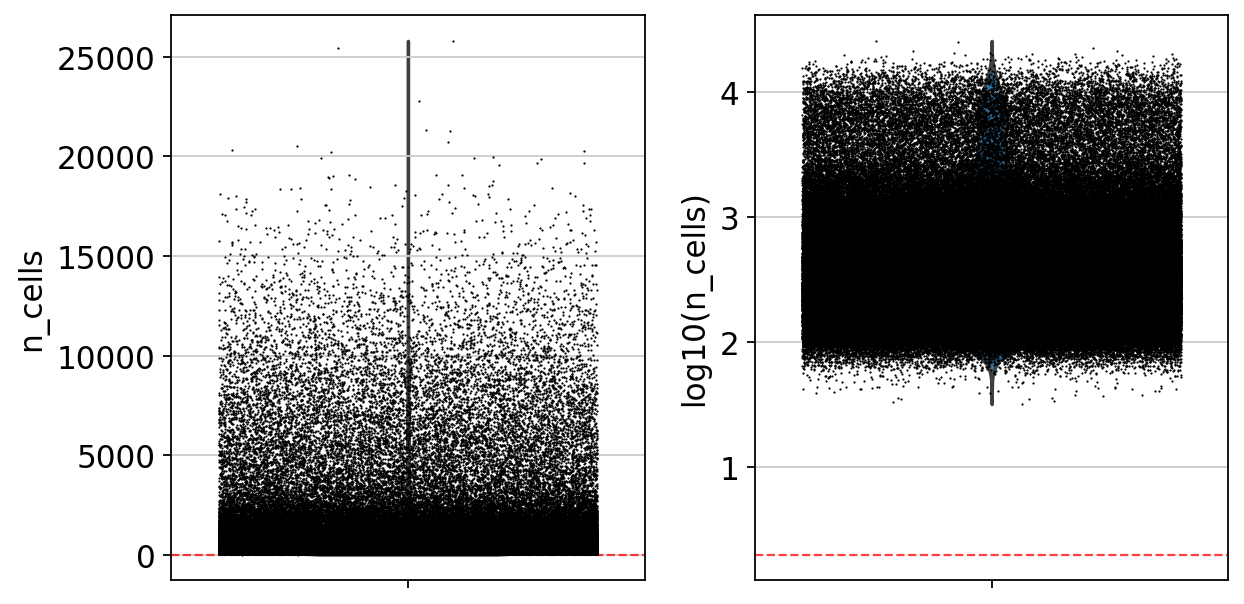

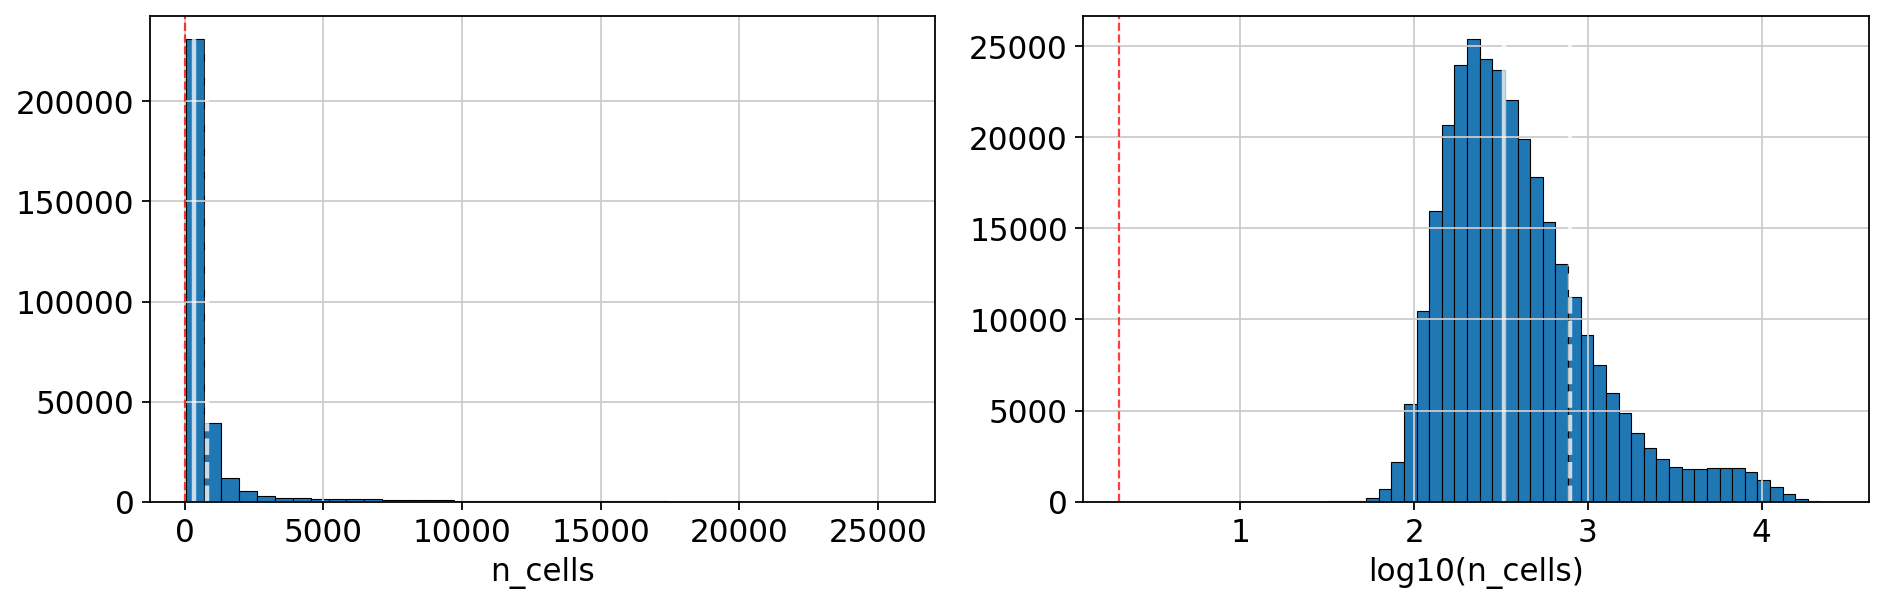

Max:	25797
Median:	330.0
Mean:	783.8100080912003
Min:	32


In [27]:
min_cells = 2
max_cells = None

epi.pl.violin(adata, "n_cells", min_threshold=min_cells, max_threshold=max_cells, show_log=True, show_mean=True, show_median=True, print_statistics=False, save=None)
epi.pl.histogram(adata, "n_cells", bins=40, min_threshold=min_cells, max_threshold=max_cells, show_log=True, show_mean=True, show_median=True, print_statistics=True, save=None)

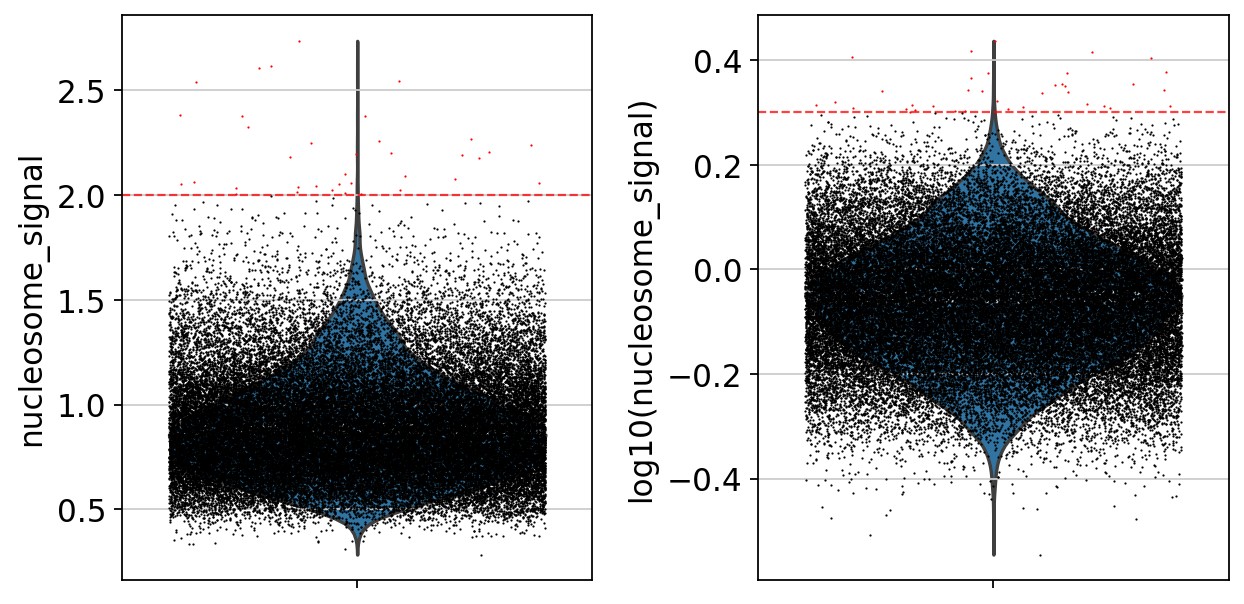

Max:	2.7345971563981
Median:	0.869897112512446
Mean:	0.9015621412069683
Min:	0.285024154589372


In [38]:
max_nucleosome_signal = 2

# epi.pl.fragment_length(adata, n=5000, threshold=max_nucleosome_signal, show_n=True)
epi.pl.violin(adata, "nucleosome_signal", max_threshold=max_nucleosome_signal, show_log=True, show_mean=True, show_median=True, print_statistics=True, save=None)

In [39]:
adata.obsm_keys

<bound method AnnData.obsm_keys of AnnData object with n_obs × n_vars = 45549 × 304034
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'nb_features', 'n_features', 'log_n_features'
    var: 'n_cells', 'log_n_cells'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_joint_wnn_umap', 'X_umap'>

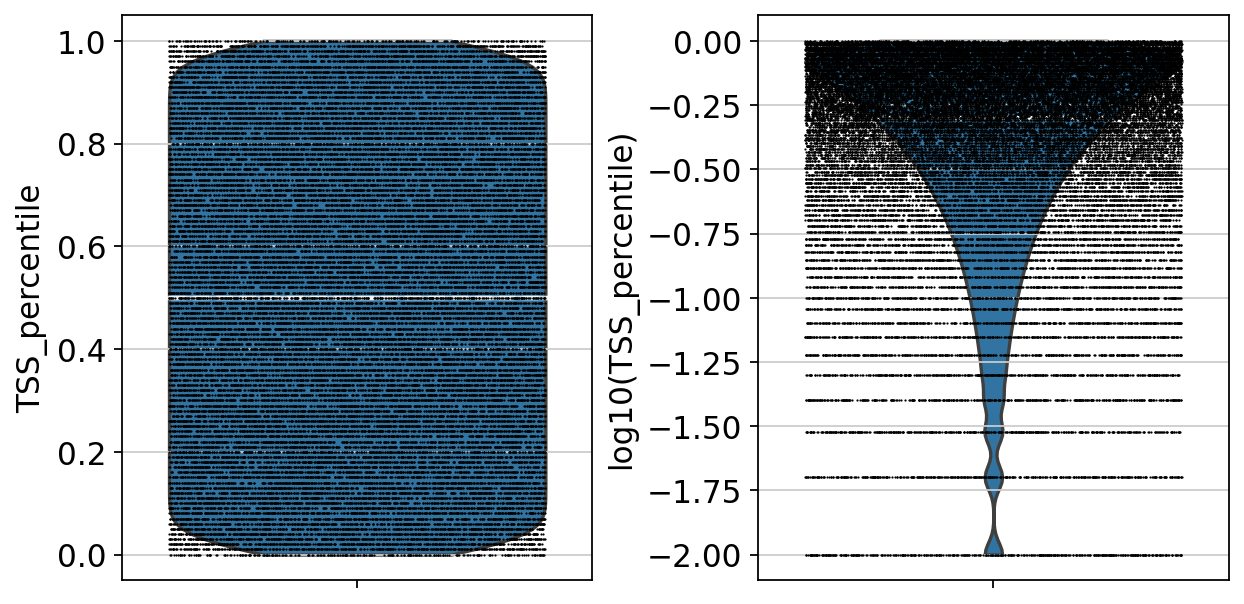

Max:	1.0
Median:	0.5
Mean:	0.5000122944521286
Min:	0.0


In [31]:

epi.pl.violin(adata, "TSS_percentile", show_log=True, show_mean=True, show_median=True, print_statistics=True, save=None)

In [32]:
# min_tss_enrichment = 2

# adata.obs["tss"] = ["high" if val > min_tss_enrichment else "low" for val in adata.obs.TSS_percentile]

# epi.pl.tss_enrichment(adata, group_by="tss", show_n=True)
# epi.pl.violin(adata, "tss_enrichment_score", min_threshold=min_tss_enrichment, show_log=True, show_mean=True, show_median=True, print_statistics=True, save=None)